# Credit Card Fraud Detection
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

##Analyse the Data

In [ ]:
#Import the relevant modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:

#Import the data
df = pd.read_csv('creditcard.csv')

#See the shape of the data
df.shape

(284807, 31)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df['Class'].value_counts()/df.shape[0]*100

print('Non-Fraud Transaction is',round(df['Class'].value_counts()[0]/len(df)*100,2),'% of the dataset')
print('Fraud Transaction is',round(df['Class'].value_counts()[1]/len(df)*100,2),'% of the dataset')

Non-Fraud Transaction is 99.83 % of the dataset
Fraud Transaction is 0.17 % of the dataset


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution')

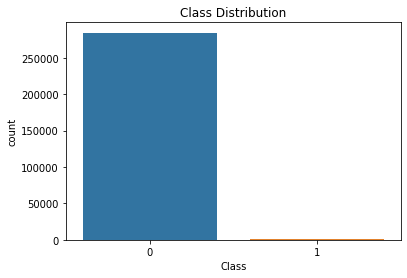

In [ ]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df['Class'])
plt.title('Class Distribution')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution of Time')

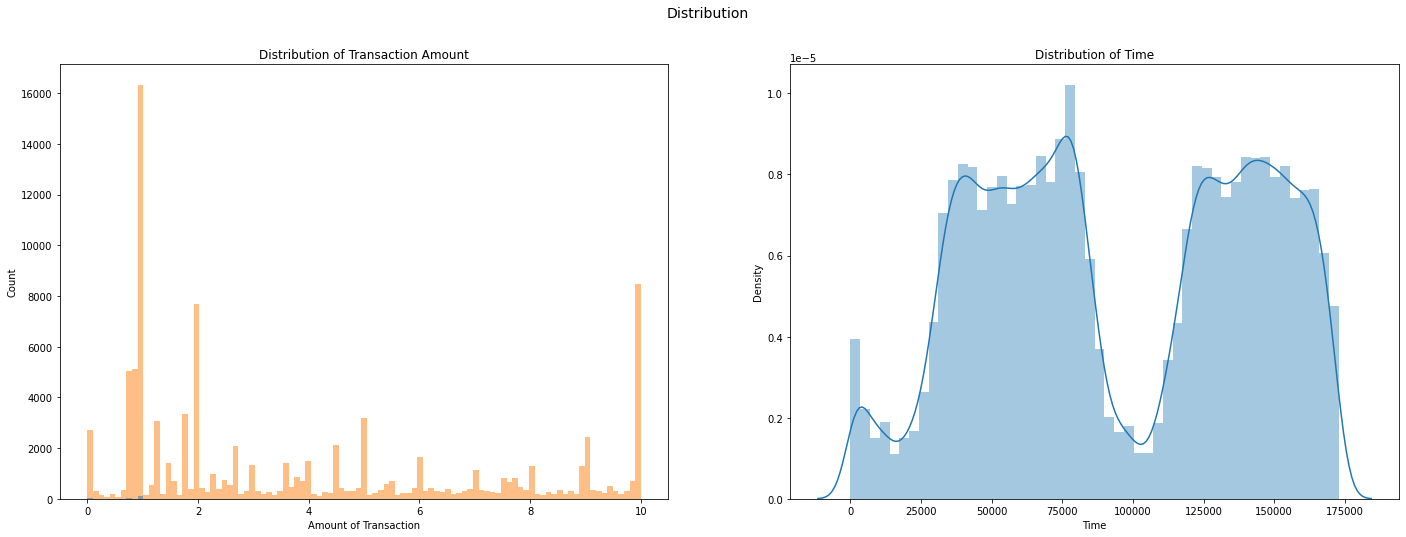

In [ ]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24,8))

# labels = ['No Fraud', 'Fraud']
f.suptitle('Distribution', fontsize=14)


#Distribution of Transaction Amount

bins = np.linspace(0, 10, 100)

data_nf = df[df['Class']==0]
data_f = df[df['Class']==1]

ax1.hist(data_nf['Amount'],bins=bins, label='Non-Fraud',alpha=0.5,color='tab:orange')
ax1.hist(data_f['Amount'],bins=bins,label='Fraud', alpha=0.5, color='tab:blue')

ax1.set_xlabel('Amount of Transaction')
ax1.set_ylabel('Count')
ax1.set_title('Distribution of Transaction Amount')


#Distribution of Time
ax2=sns.distplot(df['Time'])
ax2.set_title('Distribution of Time')

In [ ]:
df.isnull().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

# Using Logistic Regression , KNN and Decision Trees

##Scaling the variables

In [ ]:
dataset = df.copy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling = scaler.fit_transform(np.array(dataset['Amount']).reshape(-1, 1))
scaling2 = scaler.fit_transform(np.array(dataset['Time']).reshape(-1, 1))

In [ ]:
dataset['Amount']=scaling
dataset['Time']=scaling2

##Understanding Correlation

We have an imbalanced dataset so we can't see the correlation really well, so we have to handle it first. I will use SMOTE to handle the imbalanced dataset. Note that I'm doing this only to see the correlation between each feature.

###Applying synthetic minority oversampling  technique

In [ ]:
X = dataset.drop('Class', axis=1)
y = dataset['Class']

from collections import Counter
from imblearn.combine import SMOTETomek

#Implementing the technique
smk = SMOTETomek(random_state=42)

# fit and apply the transform
X_smk, y_smk = smk.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_smk))

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 284315, 1: 492})
Counter({0: 284315, 1: 284315})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(X_smk[1])

[-1.99658302  1.19185711  0.26615071  0.16648011  0.44815408  0.06001765
 -0.08236081 -0.07880298  0.08510165 -0.25542513 -0.16697441  1.61272666
  1.06523531  0.48909502 -0.1437723   0.63555809  0.46391704 -0.11480466
 -0.18336127 -0.14578304 -0.06908314 -0.22577525 -0.63867195  0.10128802
 -0.33984648  0.1671704   0.12589453 -0.0089831   0.01472417 -0.34247454]


In [ ]:
#Make a train set dataframe for SMOTE
df_smote = pd.DataFrame(X_smk ,columns = [i for i in X.columns] )

df_smote['Class']=y_smk
#Reset the index
df_smote['index']=[i for i in range((len(df_smote)))]
df_smote = df_smote.set_index('index')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution')

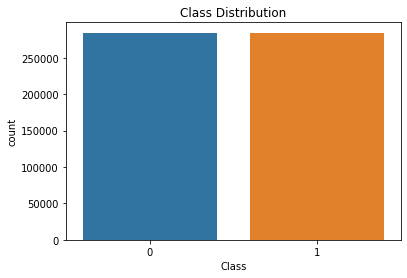

In [ ]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(df_smote['Class'])
plt.title('Class Distribution')

Text(0.5, 1.0, 'After SMOTE')

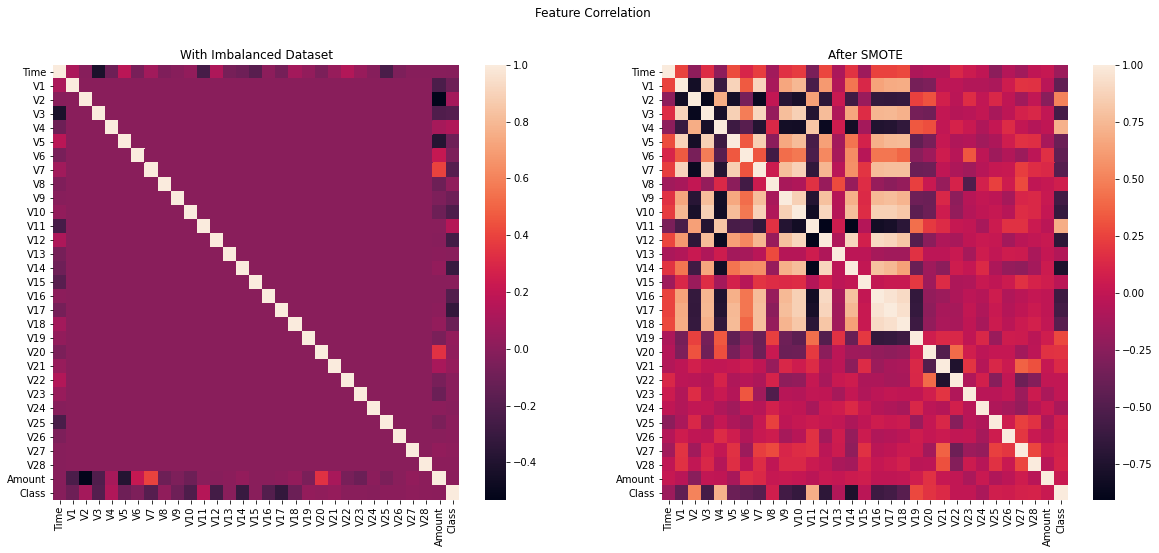

In [ ]:
#Plot a heatmap
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(20,8))
fig.suptitle('Feature Correlation')

#Imbalanced Dataset
sns.heatmap(dataset.corr(),ax=axes[0])
axes[0].set_title('With Imbalanced Dataset')

#Data after SMOTE
sns.heatmap(df_smote.corr(),ax=axes[1])
axes[1].set_title('After SMOTE')


## Removing extreme outliers



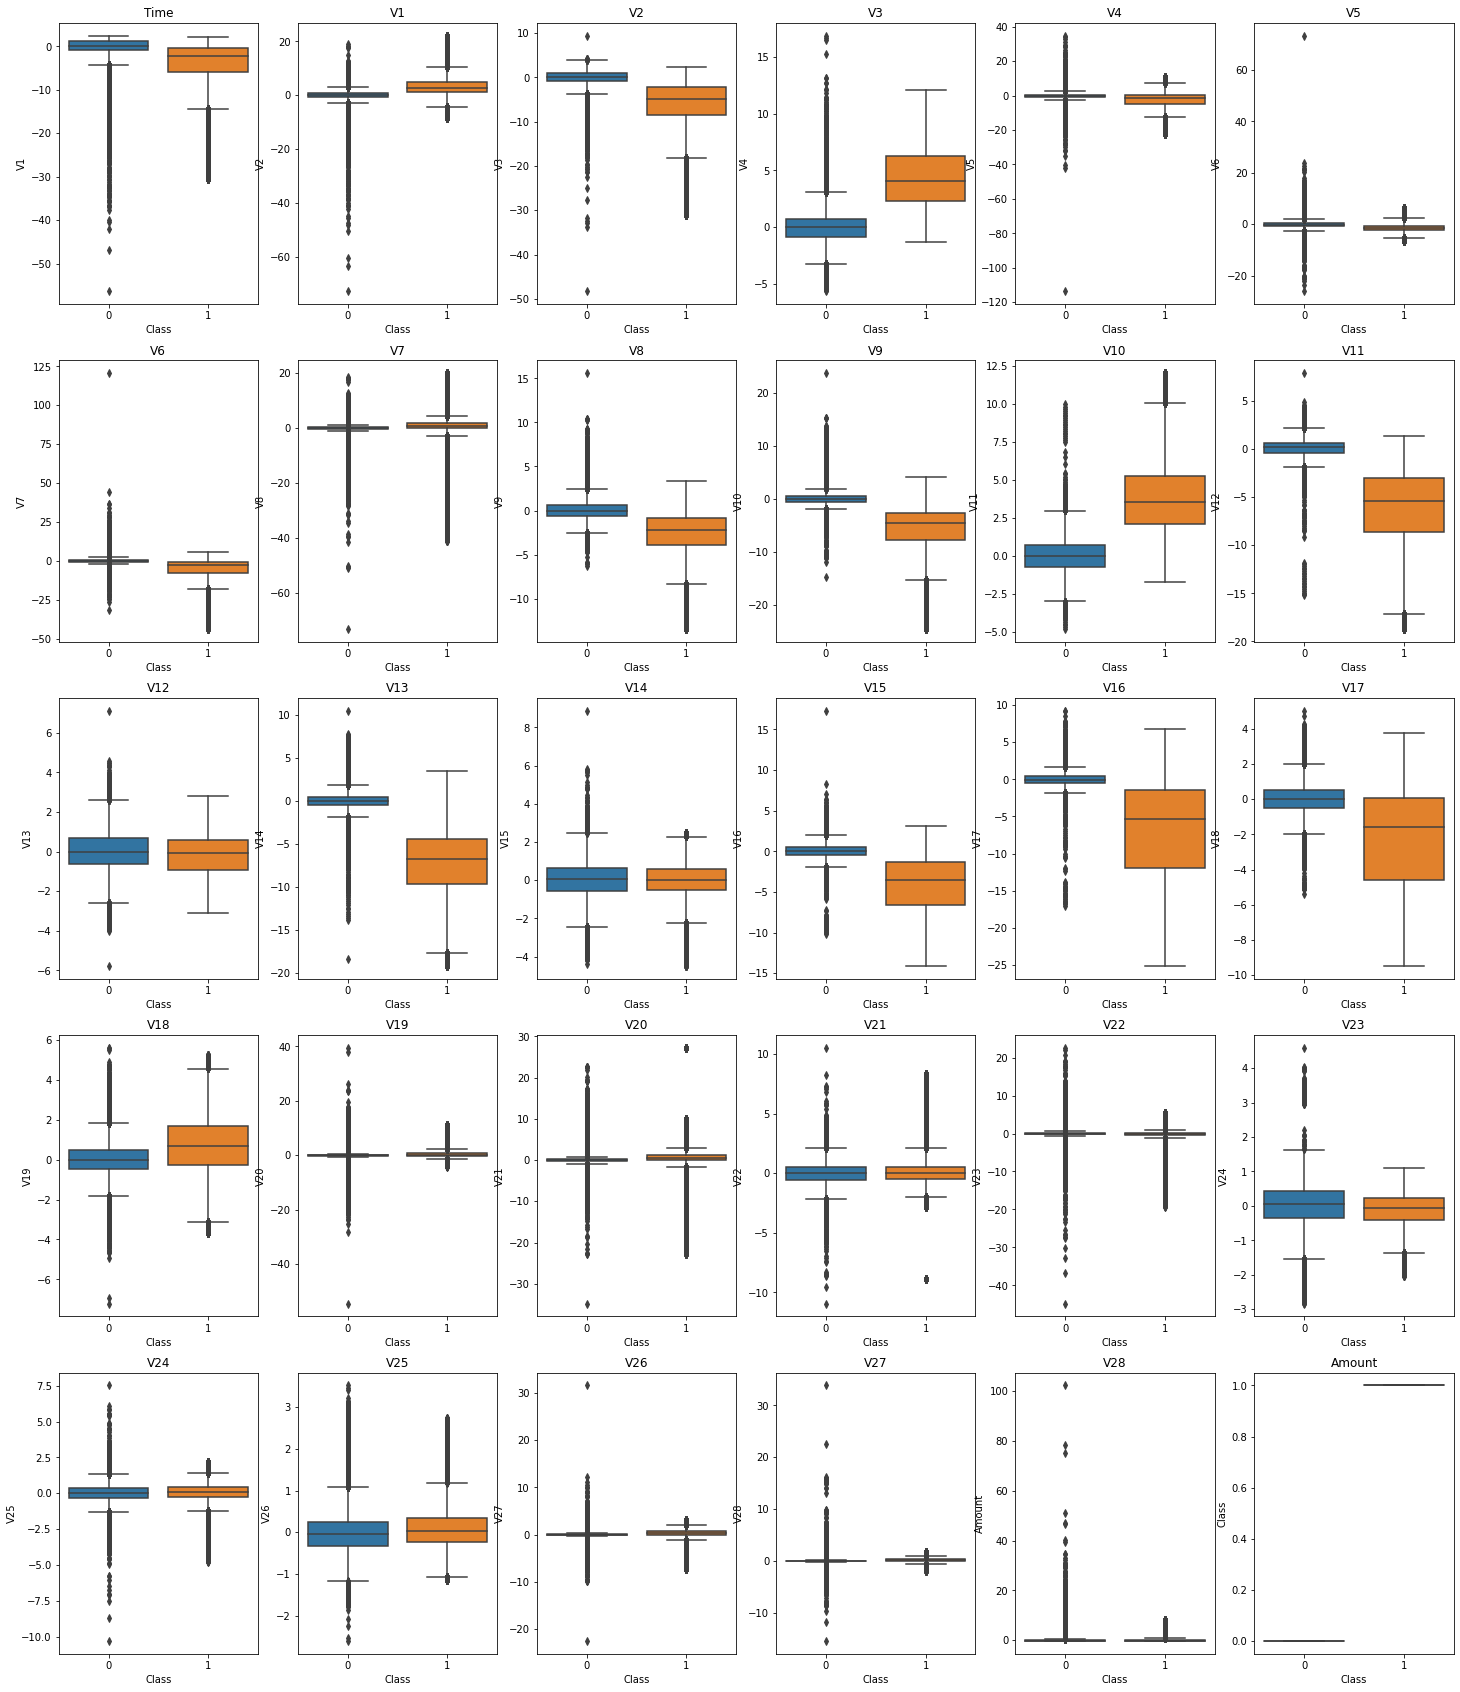

In [ ]:
col = [i for i in df_smote.columns if i!='Class']

n_rows = 5
n_cols = 6
count = 0
col_num = 1

plt.subplots(n_rows, n_cols, figsize=(25,30))

for i in range(n_rows):
    for j in range(n_cols):
        plt.subplot(n_rows, n_cols, count+1)
        sns.boxplot(y=df_smote.iloc[:, col_num],x=df_smote["Class"])
        plt.title(col[col_num-1])
        if col_num < df.shape[1] :
            count += 1
            col_num += 1

plt.show()

From the boxplot, we can see that:

Negative Correlation: Time V2 V6 V8 V9 V11 V13 V15 V16 V17

Positive Correlation: V1 V3 V10 V18

And we can see that feature that have a high correlation with the class is V2 V3 V8 V10 V11 V13 V15 V16 V17 V18 so we will remove outliers from this dataset

In [ ]:
out = ['V2', 'V3', 'V8', 'V10', 'V11', 'V13', 'V15', 'V16', 'V17', 'V18']

new_df = df_smote.copy()

for i in out:
    fraud = new_df[i].loc[new_df['Class'] == 1].values
    q25, q75 = np.percentile(fraud, 25), np.percentile(fraud, 75)

    iqr = q75 - q25

    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off

    outliers = [x for x in fraud if x < lower or x > upper]

    #Drop outliers from dataset
    new_df = new_df.drop(new_df[(new_df[i] > upper) | (new_df[i] < lower)].index)

Text(0.5, 1.0, 'After')

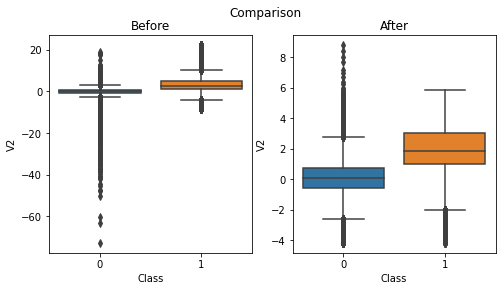

In [ ]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V2', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V2', data=new_df,ax=axes[1])
axes[1].set_title('After')

Text(0.5, 1.0, 'After')

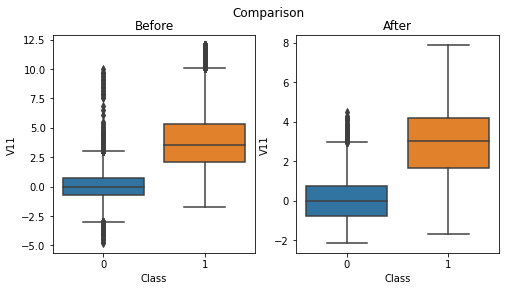

In [ ]:
#Compare dataset
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8,4))
fig.suptitle('Comparison')

sns.boxplot(x="Class", y='V11', data=df_smote,ax=axes[0])
axes[0].set_title('Before')

sns.boxplot(x="Class", y='V11', data=new_df,ax=axes[1])
axes[1].set_title('After')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distribution')

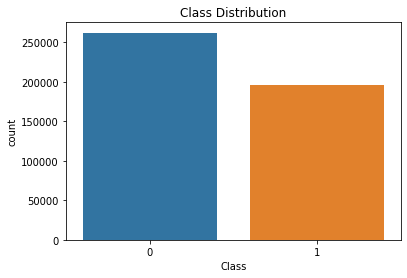

In [ ]:
#Plotting the difference betweeen fraud and non-fraud transactions
sns.countplot(new_df['Class'])
plt.title('Class Distribution')

After removing the extreme outlier, we can see that most of the outliers is from the Fraud dataset

In [ ]:
print('**Before Removing Outliers**')
print('Non-Fraud Transaction:',df_smote['Class'].value_counts()[0])
print('Fraud Transaction:',df_smote['Class'].value_counts()[1])
print(' ')
print('**After Removing Outliers**')
print('Non-Fraud Transaction:',new_df['Class'].value_counts()[0])
print('Fraud Transaction:',new_df['Class'].value_counts()[1])
print(' ')
print('**Reduce Number**')
print('Non-Fraud Transaction:',df_smote['Class'].value_counts()[0]-new_df['Class'].value_counts()[0])
print('Fraud Transaction:',df_smote['Class'].value_counts()[1]-new_df['Class'].value_counts()[1])

**Before Removing Outliers**
Non-Fraud Transaction: 284315
Fraud Transaction: 284315
 
**After Removing Outliers**
Non-Fraud Transaction: 262219
Fraud Transaction: 196315
 
**Reduce Number**
Non-Fraud Transaction: 22096
Fraud Transaction: 88000


In [ ]:
# import the library
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_us, y_us = undersample.fit_resample(X, y)

# summarize class distribution
print(Counter(y))
print(Counter(y_us))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({0: 284315, 1: 284315})
Counter({0: 284315, 1: 284315})


In [ ]:

#Make a train set dataframe for random under sampling
df_us = pd.DataFrame(X_us ,columns = [i for i in X.columns] )
df_us['Class']=y_us

#Reset the index
df_us['index']=[i for i in range(len(df_us))]
df_us = df_us.set_index('index')

#X_us = X_us.drop(['index','Class'],axis=1)

##Moedel Implementation

In [ ]:
#import library needed
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import auc
import collections

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    }

###Precision Recall Curves


In [ ]:

# precision-recall curve and f1
f1_ml={}
aucscore_ml={}
recall_ml={}
precision_ml={}

#Split dataset
X = df_smote.drop('Class', axis=1)
y = df_smote['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

for key, classifier in classifiers.items():
    #fit dataset into a machine learning
    if key=="Support Vector Classifier":
        model = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(X_train,y_train)
    else:
        model = classifier.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]

    # predict class values
    yhat = model.predict(X_test)
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)

    # summarize scores
    recall_ml[key]=lr_recall
    precision_ml[key]=lr_precision
    
    f1_ml[key]=f1_score(y_test, yhat)
    aucscore_ml[key]=auc(lr_recall, lr_precision)

####Required AVG AUC roc score 

In [ ]:
su = 0 
for key in aucscore_ml :
  su  = su + (aucscore_ml[key]-0.)
print('Average Roc Auc Score is ' +str(su/4))

Average Roc Auc Score is 0.9740049366067698


###ROC AUC Curve

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
# roc curve and auc
auc2_ml={}
fpr_ml={}
tpr_ml={}

#Split dataset
X = df_smote.drop('Class', axis=1)
y = df_smote['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state = 42)

# Turn the values into an array for feeding the classification algorithms.
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

for key, classifier in classifiers.items():
    #fit dataset into a machine learning
    if key=="Support Vector Classifier":
        model = SVC(kernel='rbf', C=1e9, gamma=1e-07, probability=True).fit(X_train,y_train)
    else:
        model = classifier.fit(X_train, y_train)

    # predict probabilities
    lr_probs = model.predict_proba(X_test)

    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    
    # calculate scores
    lr_auc = roc_auc_score(y_test, lr_probs)
    print(str(classifier) + 'has ROC AUC of ' + str(lr_auc))
    # calculate roc curves
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    
    auc2_ml[key]=lr_auc
    fpr_ml[key]=lr_fpr
    tpr_ml[key]=lr_tpr


In [ ]:

# plot the roc curve for the model
plt.plot(list(fpr_ml.values())[0], list(tpr_ml.values())[0],  label=list(tpr_ml.keys())[0])
plt.plot(list(fpr_ml.values())[1], list(tpr_ml.values())[1],  label=list(tpr_ml.keys())[1])
plt.plot(list(fpr_ml.values())[2], list(tpr_ml.values())[2],  label=list(tpr_ml.keys())[2])
#plt.plot(list(fpr_ml.values())[3], list(tpr_ml.values())[3],  label=list(tpr_ml.keys())[3])

# axis labels
plt.title('ROC-AUC Curve Machine Learning')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show the legend
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15, 10)

# show the plot
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict

# Create a DataFrame with all the scores and the classifiers names.
log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

#svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
 #                            method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)



from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
#print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

#Using Anomaly Detection Algorithms - Local Outlier Factor and Isolation Forest


In [ ]:
columns = df.columns.tolist()
columns = [c for c in columns if c not in ['Class']]
target = 'Class'
X= df[columns]
Y= df[target]
print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [ ]:

from sklearn.metrics import  classification_report , accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

state = 1

classifiers = {
    "Isolation Forest": IsolationForest(max_samples=len(X), 
                                        contamination=0.03, 
                                        random_state=2),
              "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20,
                  contamination = 0.03)
}

In [ ]:
Fraud = df[df['Class']==1]

normal = df[df['Class']==0]

n_outliers=len(Fraud)
for i,(clf_name,clf) in enumerate(classifiers.items()):
    if clf_name == "Local Outlier Factor":
        y_pred = clf.fit_predict(X)
        scores_pred = clf.negative_outlier_factor_
    else:
        clf.fit(X)
        scores_pred = clf.decision_function(X)
        y_pred = clf.predict(X)
    
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    n_errors = (y_pred!=Y).sum()
    
    print('{} : {}'.format(clf_name, n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))

Isolation Forest : 8213
0.9711629278774749
              precision    recall  f1-score   support

           0       1.00      0.97      0.99    284315
           1       0.05      0.84      0.09       492

    accuracy                           0.97    284807
   macro avg       0.52      0.90      0.54    284807
weighted avg       1.00      0.97      0.98    284807

Local Outlier Factor : 8719
0.9693862861516747
              precision    recall  f1-score   support

           0       1.00      0.97      0.98    284315
           1       0.02      0.32      0.04       492

    accuracy                           0.97    284807
   macro avg       0.51      0.65      0.51    284807
weighted avg       1.00      0.97      0.98    284807

